In [39]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import seaborn as sns

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(3)

#csv파일 불러온다
df = pd.read_csv('heart.csv',index_col=None,header=None)

'''

print(df.info())

print(df.head())

'''

#sex,chestpain,restingec,exercise,heartdiseas의 문자를 숫자로 변환
dataset=df.values
e=LabelEncoder()
e.fit(dataset[1:,1])
dataset[1:,1]=e.transform(dataset[1:,1])
e=LabelEncoder()
e.fit(dataset[1:,2])
dataset[1:,2]=e.transform(dataset[1:,2])
e=LabelEncoder()
e.fit(dataset[1:,6])
dataset[1:,6]=e.transform(dataset[1:,6])
e=LabelEncoder()
e.fit(dataset[1:,8])
dataset[1:,8]=e.transform(dataset[1:,8])
e=LabelEncoder()
e.fit(dataset[1:,10])
dataset[1:,10]=e.transform(dataset[1:,10])

print(df)
#숫자로 변환한것을new_heart.csv로 저장
df.to_csv('new_heart.csv')


      0    1              2          3            4          5           6   \
0    Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG   
1     40    1              1        140          289          0           1   
2     49    0              2        160          180          0           1   
3     37    1              1        130          283          0           2   
4     48    0              0        138          214          0           1   
5     54    1              2        150          195          0           1   
6     39    1              2        120          339          0           1   
7     45    0              1        130          237          0           1   
8     54    1              1        110          208          0           1   
9     37    1              0        140          207          0           1   
10    48    0              1        120          284          0           1   
11    37    0              2        130          211

1    508
0    410
Name: HeartDisease, dtype: int64


Text(0.5,1,'Heart Disease')

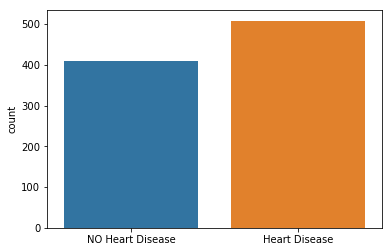

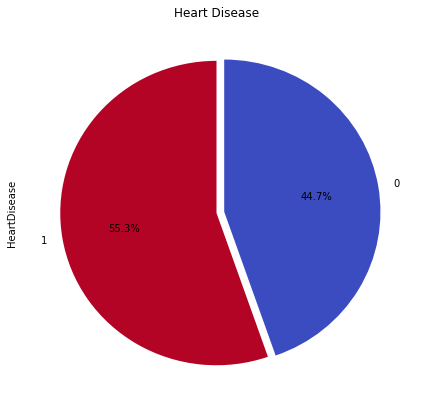

In [40]:
#심장병환자의 수 시각화
df_new3=pd.read_csv('new_heart2.csv')
print(df_new3["HeartDisease"].value_counts())

f=sns.countplot(x='HeartDisease',data=df_new3)
f.set_xticklabels(['NO Heart Disease','Heart Disease'])
plt.xlabel("")

fig,ax=plt.subplots(1, 1, figsize = (7,7))
df_new3['HeartDisease'].value_counts().plot.pie(explode=[0,0.05],startangle=90, autopct='%0.1f%%',ax=ax,cmap='coolwarm_r')
plt.title("Heart Disease")

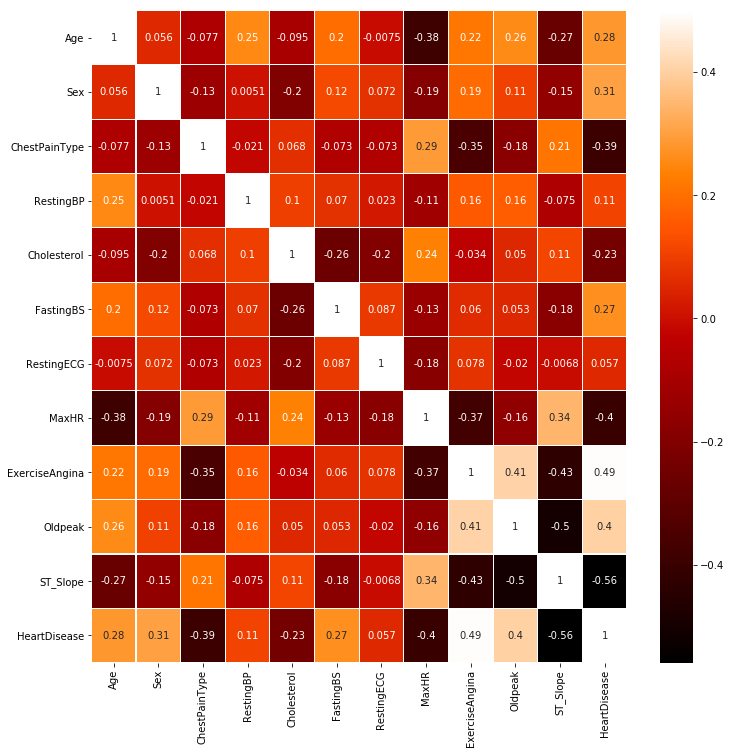

In [41]:
#데이터 시각화-관계도
colormap=plt.cm.gist_heat
plt.figure(figsize=(12,12))
sns.heatmap(df_new3.corr(),linewidths=0.1,vmax=0.5,cmap=colormap,linecolor='white',annot =True)
plt.show()

/opt/anaconda3/envs/ten/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/ten/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/ten/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/an

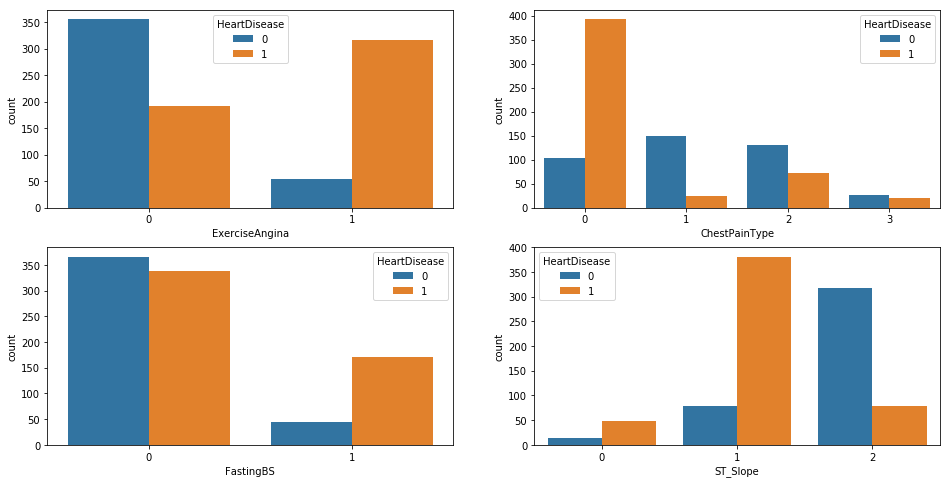

<Figure size 432x288 with 0 Axes>

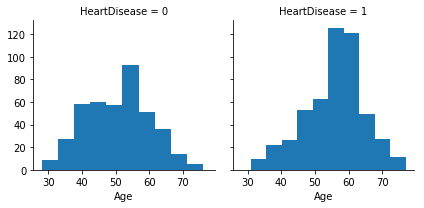

In [42]:
f, ax = plt.subplots(2, 2, figsize=(16, 8))

#협심증유발운동과 심장병의 관계 - 협심증유발운동을 한것이 발병수가 더 많다
sns.countplot('ExerciseAngina', hue='HeartDisease', data=df_new3,ax=ax[0,0])

#가슴통증과의 관계 0=무증상 1=비전형적협심증 2=비협심증통증 3=전형적인협심증
#증상이 없을때 더 많은 심장질환을 발견
sns.countplot('ChestPainType', hue='HeartDisease', data=df_new3, ax=ax[0,1])

#공복시 혈당>120(0=False 1=True) - 120이상일때 심장질환자가 비심장질환자보다 많음
sns.countplot('FastingBS', hue='HeartDisease', data=df_new3, ax=ax[1,0])

#최대 운동 심전도의 기울기(0=하강 1=평면 2=상승)
#비교적 하강일때와 평면일경우 확률이 높다 - 평면일때 가장 높음
sns.countplot('ST_Slope', hue='HeartDisease', data=df_new3, ax=ax[1,1])

#나이와 심장병 관계 - 50대 이상일 경우 심장병발병수 더 많음
plt.figure(2)
grid=sns.FacetGrid(df_new3,col='HeartDisease')
grid.map(plt.hist,'Age',bins=10)
plt.show()

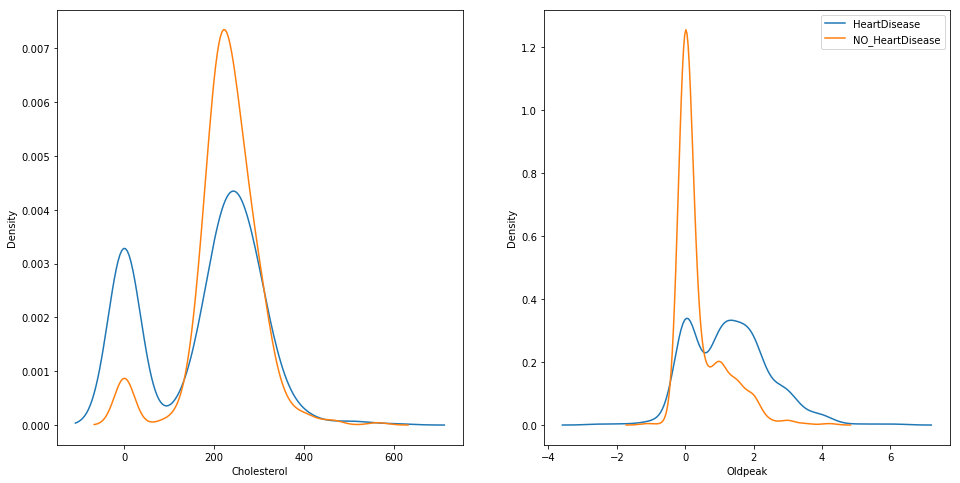

In [43]:
#콜레스테롤과의 연관도 - 낮을수록 발병률 높다 
#오류인지 모르겠지만 자료에 콜레스테롤이 0으로 표기된 부분이 많음
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.kdeplot(df_new3[df_new3['HeartDisease']==1]['Cholesterol'], ax=ax[0])
sns.kdeplot(df_new3[df_new3['HeartDisease']==0]['Cholesterol'], ax=ax[0])
plt.legend(['HeartDisease', 'NO_HeartDisease'])

#oldpeak : 안정되기까지 운동에 의해 유발되는 심전도하강
#oldpeak이 0이상일때 심장질환 발병률 높다
sns.kdeplot(df_new3[df_new3['HeartDisease']==1]['Oldpeak'], ax=ax[1])
sns.kdeplot(df_new3[df_new3['HeartDisease']==0]['Oldpeak'], ax=ax[1])
plt.legend(['HeartDisease', 'NO_HeartDisease'])
plt.show()

1    725
0    193
Name: Sex, dtype: int64


/opt/anaconda3/envs/ten/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


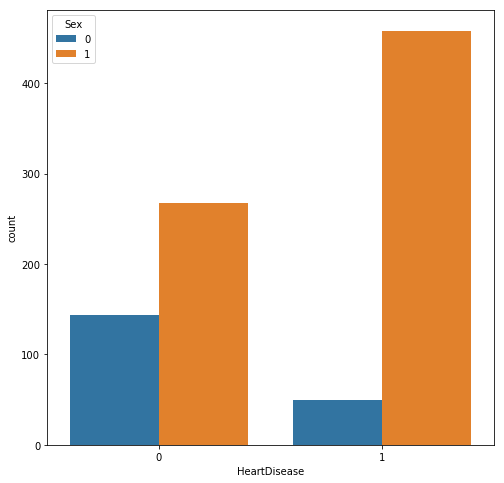

In [44]:
#성별별 심장병연관도 - 남성의경우 여성보다 발병률이 높음
print(df_new3["Sex"].value_counts())
plt.figure(figsize=(8,8))
sns.countplot('HeartDisease', hue='Sex', data=df_new3)

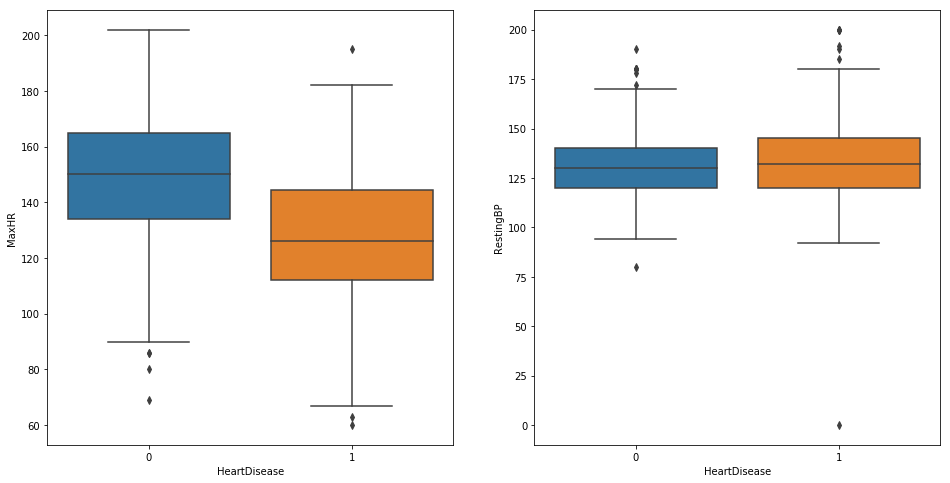

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
#최대심박수와의 관계 - 최대심박수 ~140 일때 발병률 더 높다
sns.boxplot(data=df_new3, x="HeartDisease", y="MaxHR",ax=ax[0])

#평상시혈압과 심장질환과의 연관성은 없어보임
sns.boxplot(data=df_new3, x="HeartDisease", y="RestingBP",ax=ax[1])

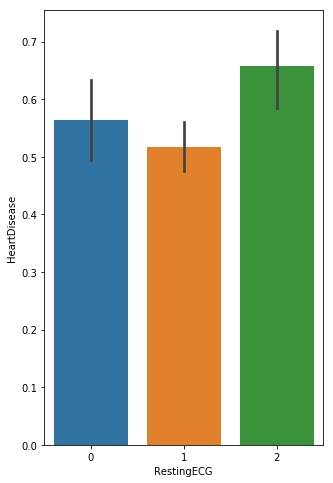

In [46]:
#안정 심전도 결과(0 = 좌심실 비대; 1 = 정상; 2 = 심전도 비정상)
#정상에비해 0,2의 결과가 조금더 높으나 비슷함
plt.figure(figsize=(5, 8))
sns.barplot(data=df_new3 , x="RestingECG", y="HeartDisease")

In [47]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(3)
#new_heart.csv를 불러온다
df_new=pd.read_csv('new_heart.csv',header=None)
dataset=df_new.values
#항목줄을 제외한 특징데이터를 X에 저장, Y에 심장병 유무 저장
X=dataset[2:,1:12]
Y=dataset[2:,12]
#학습셋과 테스트 셋의 구분. 테스트셋 20%, 학습셋 80%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=seed)

print(X_train.shape)
print(X_test.shape)

(734, 11)
(184, 11)


Train on 734 samples, validate on 184 samples
Epoch 1/350
734/734 [==============================] - 0s 388us/step - loss: 4.0810 - acc: 0.5763 - val_loss: 2.4726 - val_acc: 0.3859

Epoch 00001: val_loss improved from inf to 2.47261, saving model to ./model/01-2.4726.hdf5
Epoch 2/350
734/734 [==============================] - 0s 5us/step - loss: 2.3475 - acc: 0.5204 - val_loss: 2.7256 - val_acc: 0.4293

Epoch 00002: val_loss did not improve from 2.47261
Epoch 3/350
734/734 [==============================] - 0s 6us/step - loss: 2.0489 - acc: 0.5599 - val_loss: 1.7395 - val_acc: 0.4674

Epoch 00003: val_loss improved from 2.47261 to 1.73947, saving model to ./model/03-1.7395.hdf5
Epoch 4/350
734/734 [==============================] - 0s 7us/step - loss: 1.5191 - acc: 0.5300 - val_loss: 1.9591 - val_acc: 0.4620

Epoch 00004: val_loss did not improve from 1.73947
Epoch 5/350
734/734 [==============================] - 0s 6us/step - loss: 1.4784 - acc: 0.5490 - val_loss: 1.1810 - val_acc: 0.

<function matplotlib.pyplot.show(*args, **kw)>

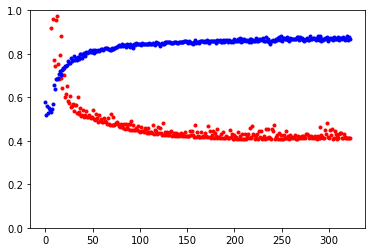

In [48]:
#모델 학습

#케라스순차모델
model=Sequential()
model.add(Dense(64, input_dim=11,activation='relu'))    #11개의 값 받아 64개 노드로 보낸다.은닉층
model.add(Dense(32, activation='relu'))                 #은닉층
model.add(Dense(16, activation='relu'))                 #은닉층
model.add(Dense(1,activation='sigmoid'))                #노드1개, 활성화함수=sigmoid출력층

#컴파일,이진분류
model.compile(loss='binary_crossentropy',               
             optimizer='adam',
             metrics=['accuracy'])

#재학습시 시간절약위해 
#모델 저장 폴더 설정
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
#모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
#앞서 저장한 모델보다 나아졌을 때만 저장
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)


#오차가 줄지않을때 과적합하지않도록 학습자동중단설정
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=100)

hist=model.fit(X,Y,validation_split=0.20,epochs=350,batch_size=500,callbacks=[early_stopping_callback,checkpointer])
print("\n Accuracy:%.4f"%(model.evaluate(X,Y)[1]))

#빨간색 손실,파란색 예측값 표로 나타내기
y_vloss=hist.history['val_loss'] #테스트셋으로 실험결과 오차값 저장

y_acc=hist.history['acc']        #학습셋으로 측정한 정확도값 저장

x_len=numpy.arange(len(y_acc))
plt.plot(x_len,y_vloss,"o",c="red",markersize=3)
plt.plot(x_len,y_acc,"o",c="blue",markersize=3)
plt.ylim([0,1])
plt.show

In [49]:
#k겹 교차검증
#5겹
n_fold=5
skf=StratifiedKFold(n_splits=n_fold,shuffle=True, random_state=seed)
#빈 accuracy배열
accuracy=[]
#모델 설정, 컴파일, 실행
for train,test in skf.split(X,Y):
    model_k=Sequential()
    model_k.add(Dense(64, input_dim=11,activation='relu'))    #11개의 값 받아 64개 노드로 보낸다.은닉층
    model_k.add(Dense(32, activation='relu'))                 #은닉층
    model_k.add(Dense(16, activation='relu'))                 #은닉층
    model_k.add(Dense(1,activation='sigmoid'))                #노드1개, 활성화함수=sigmoid출력층
    
    #모델 컴파일
    model_k.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    #모델실행 100번학습,5번씩 나눠서
    model_k.fit(X[train],Y[train],epochs=100,batch_size=5)
    #k겹 검증 결과 저장
    k_accuracy="%.4f"%(model_k.evaluate(X[test],Y[test])[1])
    accuracy.append(k_accuracy)
#출력
print("\n %.f Fold Accuracy:"%n_fold,accuracy)

Epoch 1/100
734/734 [==============================] - 0s 444us/step - loss: 1.1242 - acc: 0.6785
Epoch 2/100
734/734 [==============================] - 0s 156us/step - loss: 0.7431 - acc: 0.6853
Epoch 3/100
734/734 [==============================] - 0s 146us/step - loss: 0.6500 - acc: 0.7153
Epoch 4/100
734/734 [==============================] - 0s 140us/step - loss: 0.6139 - acc: 0.7234
Epoch 5/100
734/734 [==============================] - 0s 152us/step - loss: 0.5558 - acc: 0.7507
Epoch 6/100
734/734 [==============================] - 0s 150us/step - loss: 0.6547 - acc: 0.7411
Epoch 7/100
734/734 [==============================] - 0s 142us/step - loss: 0.5223 - acc: 0.7411
Epoch 8/100
734/734 [==============================] - 0s 148us/step - loss: 0.4823 - acc: 0.7820
Epoch 9/100
734/734 [==============================] - 0s 153us/step - loss: 0.5156 - acc: 0.7602
Epoch 10/100
734/734 [==============================] - 0s 246us/step - loss: 0.5273 - acc: 0.7534
Epoch 11/100
734/73

In [51]:
#위의 데이터를 토대로
#협심증유발운동 유, 50대 이상, 남성, 최대심박수 140이하, 콜레스테롤 낮음
#가슴통증 없음, oldpeak 0이상, 공복시혈당 True일경우 심장질환확률 높을것으로 예상 
# 가상의 환자 데이터 입력
#Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
patient = numpy.array([[55,1,0,160,120,1,0,130,1,1,0]])
# k교차검증모델로 예측
pred = model_k.predict(patient)
# 예측결과 출력
print(pred*100)

[[94.81547]]


In [52]:
#로지스틱회귀

lr = LogisticRegression()
lr.fit(X_train,Y_train)
acc = lr.score(X_test,Y_test)

accuracies['Logistic Regression'] = acc
print("Accuracy of Logistic Regression: {:.2f}".format(acc))

Accuracy of Logistic Regression: 0.84


In [53]:
#가우시안 나이브 베이즈

nb = GaussianNB()
nb.fit(X_train, Y_train)
acc = nb.score(X_test,Y_test)
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}".format(acc))

Accuracy of Naive Bayes: 0.85


In [54]:
#랜덤포레스트분류기
accuracies={}
rfc=RandomForestClassifier()
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)
acc = rfc.score(X_test, Y_test)
print('Classification report\n',classification_report(Y_test, rfc_pred))
print("Accuracy of Random Forest Classifier: {:.2f}".format(acc))

Classification report
              precision    recall  f1-score   support

          0       0.85      0.81      0.83        77
          1       0.86      0.90      0.88       107

avg / total       0.86      0.86      0.86       184

Accuracy of Random Forest Classifier: 0.86


In [55]:
#결정트리분류기

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)
acc = dtc.score(X_test, Y_test)
accuracies['Decision Tree'] = acc
print('Classification report\n',classification_report(Y_test, dtc_pred))
print("Accuracy of Decision Tree Classifier: {:.2f}".format(acc))

Classification report
              precision    recall  f1-score   support

          0       0.67      0.81      0.73        77
          1       0.84      0.72      0.77       107

avg / total       0.77      0.76      0.76       184

Accuracy of Decision Tree Classifier: 0.76


In [56]:
#K-NN 분류기

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train , Y_train)
knn_pred = knn.predict(X_test)
acc = knn.score(X_test,Y_test)
accuracies['KNN'] = acc
print('Classification report\n',classification_report(Y_test, knn_pred))
print("Accuracy of KNN: {:.2f}".format(acc))

Classification report
              precision    recall  f1-score   support

          0       0.62      0.71      0.67        77
          1       0.77      0.69      0.73       107

avg / total       0.71      0.70      0.70       184

Accuracy of KNN: 0.70


In [57]:
#CatBoost분류기

cb = CatBoostClassifier(iterations=100)
cb.fit(X_train, Y_train)
cbpred = cb.predict(X_test)
acc = cb.score(X_test,Y_test)
accuracies['CatBoostClassifier'] = acc
print('Accuracy:', accuracy_score(Y_test, cbpred))
print('Classification report\n',classification_report(Y_test, cbpred))
print("Accuracy of CatBoostClassifier: {:.2f}".format(acc))

Learning rate set to 0.074574
0:	learn: 0.6600156	total: 3.1ms	remaining: 307ms
1:	learn: 0.6293695	total: 3.97ms	remaining: 195ms
2:	learn: 0.6022701	total: 4.87ms	remaining: 158ms
3:	learn: 0.5792644	total: 5.59ms	remaining: 134ms
4:	learn: 0.5598951	total: 6.47ms	remaining: 123ms
5:	learn: 0.5430089	total: 6.77ms	remaining: 106ms
6:	learn: 0.5245883	total: 7.09ms	remaining: 94.3ms
7:	learn: 0.5099056	total: 7.74ms	remaining: 89ms
8:	learn: 0.4939711	total: 8.18ms	remaining: 82.7ms
9:	learn: 0.4816855	total: 9.19ms	remaining: 82.7ms
10:	learn: 0.4689088	total: 9.95ms	remaining: 80.5ms
11:	learn: 0.4567221	total: 10.8ms	remaining: 78.9ms
12:	learn: 0.4452633	total: 11.6ms	remaining: 77.3ms
13:	learn: 0.4359649	total: 12.4ms	remaining: 76.1ms
14:	learn: 0.4266533	total: 13ms	remaining: 73.8ms
15:	learn: 0.4173426	total: 13.7ms	remaining: 72.2ms
16:	learn: 0.4093067	total: 14.5ms	remaining: 70.7ms
17:	learn: 0.4020710	total: 15.1ms	remaining: 68.9ms
18:	learn: 0.3945703	total: 15.8ms	re